<a href="https://colab.research.google.com/github/junyong838/Linear-Algebra/blob/main/%EC%84%A0%EB%8C%805%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

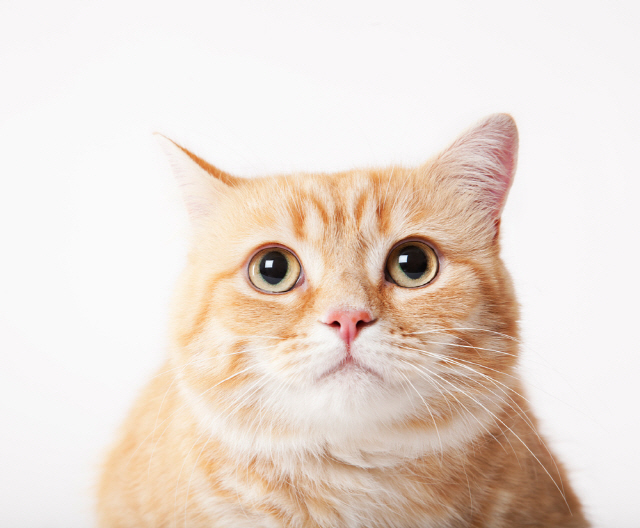

-1

In [ ]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow

img='/content/drive/MyDrive/선형대수학/lab1.JPG'

im = cv2.imread(img)
cv2_imshow(im)
cv2.waitKey(0)

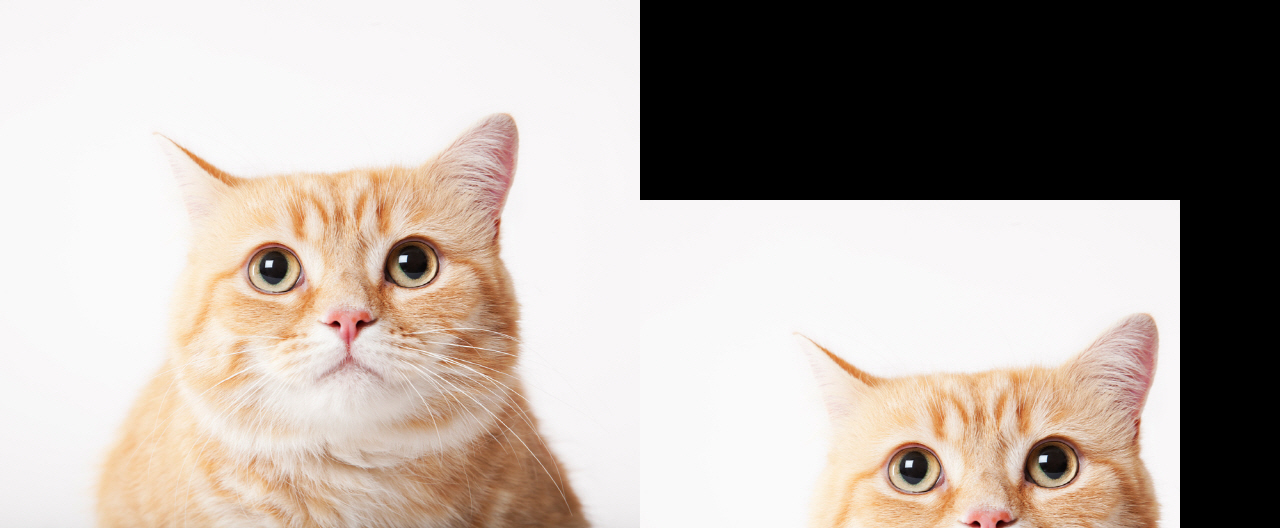

In [ ]:
IMG=cv2.imread(img,cv2.IMREAD_COLOR)

height, width=IMG.shape[:2]

M=np.array([[1,0,100],[0,1,200],[0,0,1]],dtype=float)

dst=np.zeros(IMG.shape, dtype=np.uint8)

for y in range(height-1):
  for x in range(width-1):
    p=np.array([x,y,1])
    p_=np.dot(M,p)

    x_,y_=p_[:2]
    x_=int(x_)
    y_=int(y_)
    if x_>0 and x_<width and y_>0 and y_ <height:
      dst[y_,x]=IMG[y,x]

result=cv2.hconcat([IMG,dst])
cv2_imshow(result)
#cv2.waitkey(0)

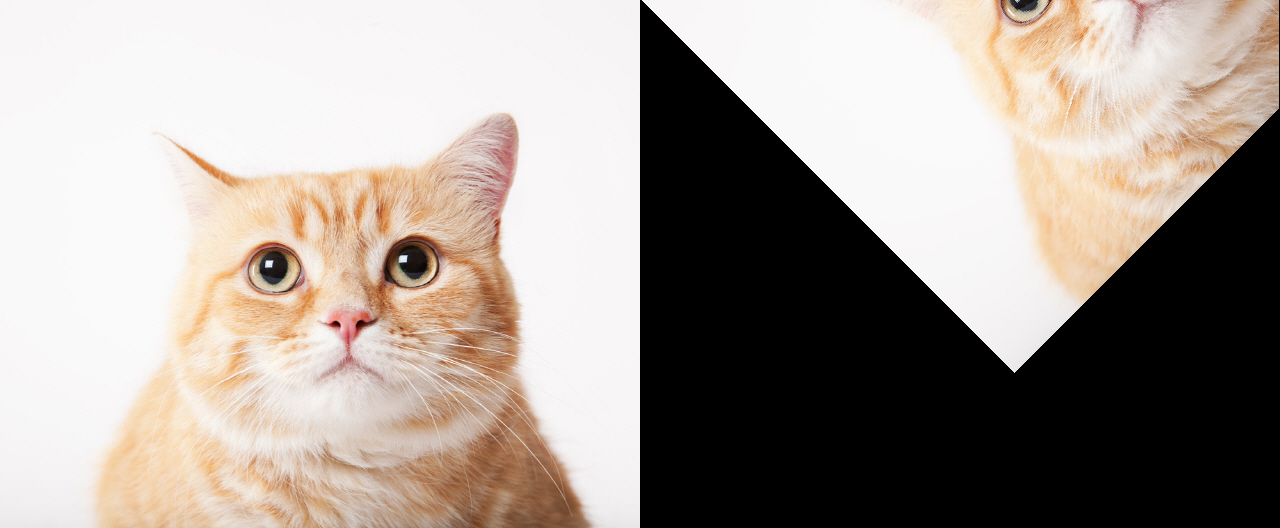

In [ ]:
Img=cv2.imread(img,cv2.IMREAD_COLOR)

height, width = Img.shape[:2]

angle = 45
radian=angle*np.pi/180
c=np.cos(radian)
s=np.sin(radian)

rotation_matrix = np.array([[c,s,0],[-s,c,0],[0,0,1]],dtype = float)
dst=np.zeros(Img.shape,dtype=np.uint8)
for y in range(height-1):
  for x in range(width -1):
    new_p=np.array([x,y,1])
    inv_rotation_matrix=np.linalg.inv(rotation_matrix)
    old_p=np.dot(inv_rotation_matrix,new_p)
    x_,y_=old_p[:2]
    x_=int(x_)
    y_=int(y_)

    if x_ >0 and x_ < width and y_> 0 and y_ < height:
      dst[y,x]=Img[y_,x_]
result=cv2.hconcat([Img,dst])
cv2_imshow(result)

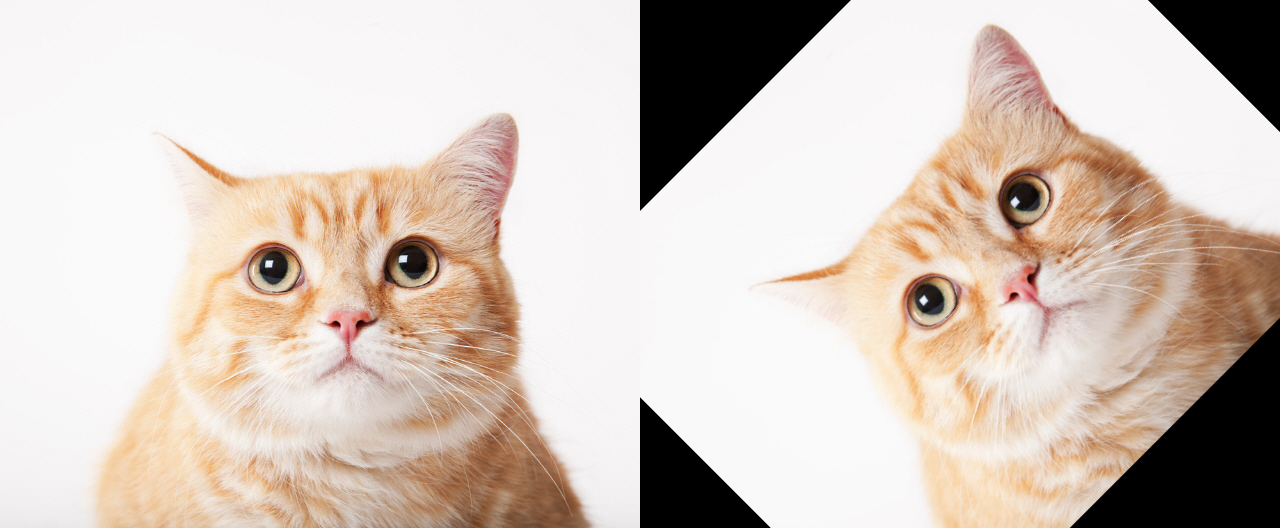

In [ ]:
height, width = Img.shape[:2]

angle=45
center=(width/2,height/2)

rotation_matrix=cv2.getRotationMatrix2D(center,angle,1)

dst=cv2.warpAffine(Img,rotation_matrix,(width,height))
result=cv2.hconcat([Img,dst])
cv2_imshow(result)

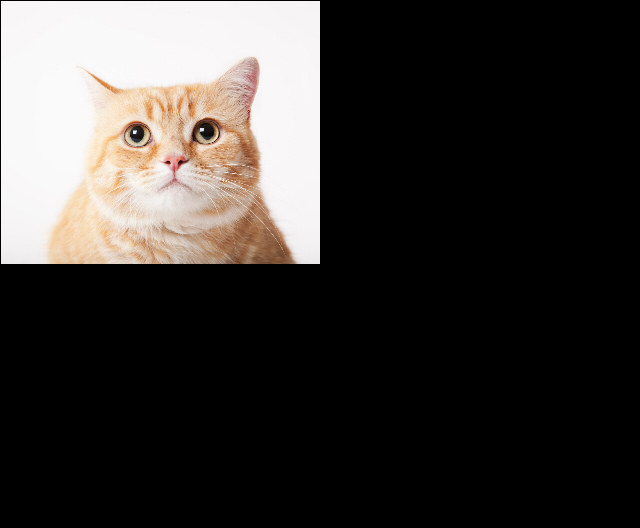

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img=cv2.imread('/content/drive/MyDrive/선형대수학/lab1.JPG',cv2.IMREAD_COLOR)
height, width=img.shape[:2]
scale_factor=0.5
scaling_matrix=np.array([[scale_factor,0,0],[0,scale_factor,0],[0,0,1]])
dst=np.zeros((height,width,img.shape[2]),dtype=np.uint8)
for y in range(height):
  for x in range(width):
    new_p=np.array([x,y,1])
    inv_scaling_matrix=np.linalg.inv(scaling_matrix)
    old_p=np.dot(inv_scaling_matrix,new_p)
    x_,y_=old_p[:2]
    x_=int(x_)
    y_=int(y_)
    if x_ > 0 and x_ < width and y_ > 0 and y_ < height:
      dst.itemset((y,x,0),img.item(y_,x_,0))
      dst.itemset((y,x,1),img.item(y_,x_,1))
      dst.itemset((y,x,2),img.item(y_,x_,2))
result=cv2.hconcat([img,dst])
cv2_imshow(dst)


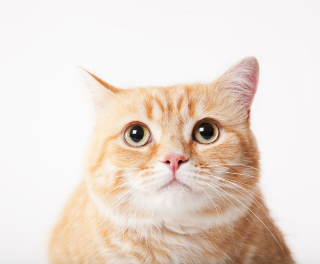

In [ ]:
dst=cv2.resize(img,(int(width*1/2),int(height*1/2)))
cv2_imshow(dst)

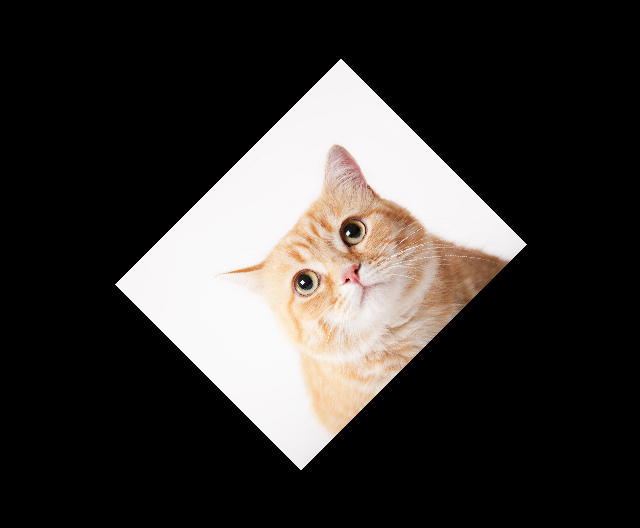

In [ ]:
img=cv2.imread('/content/drive/MyDrive/선형대수학/lab1.JPG',cv2.IMREAD_COLOR)
height, width=img.shape[:2]
scale_factor=0.5
scaling_matrix=np.array([[scale_factor,0,0],[0,scale_factor,0],[0,0,1]])
translation_matrix=np.array([[1,0,width/4],[0,1,height/4],[0,0,1]])
angle=45
radian=angle*np.pi/180
c=np.cos(radian)
s=np.sin(radian)
center_x=width/2
center_y=height/2
rotation_matrix=np.array([[c,s,(1-c)*center_x-s*center_y],[-s,c,s*center_x+(1-c)*center_y],[0,0,1]])
T=np.eye(3)
T=np.dot(scaling_matrix,T)
T=np.dot(translation_matrix,T)
T=np.dot(rotation_matrix,T)
dst=np.zeros((height,width,img.shape[2]),dtype=np.uint8)
for y in range(height):
  for x in range(width):
    new_p=np.array([x,y,1])
    inv_scaling_matrix=np.linalg.inv(T)
    old_p=np.dot(inv_scaling_matrix,new_p)
    x_,y_=old_p[:2]
    x_=int(x_)
    y_=int(y_)
    if x_ > 0 and x_ < width and y_ > 0 and y_ < height:
      dst.itemset((y,x,0),img.item(y_,x_,0))
      dst.itemset((y,x,1),img.item(y_,x_,1))
      dst.itemset((y,x,2),img.item(y_,x_,2))
cv2_imshow(dst)
